##### Data = 'Ames_Housing_Subset.csv'
##### Data Attributes Discription = 'Ames_Housing_Subset_Feature_Description.txt' or 'IndustryProblem_Attribute.txt'

--------------------------

# Business Problem Case (Scenario)

Suppose you are working as a data analyst in a certain company. A real estate investor hires you for a task. He wants to buy and sell some properties in Ames, Iowa, US. But these are in different neighbourhoods and varying conditions.

You need to finalise some neighbourhoods where the investor can do business. As a data analyst, you should do this by keeping the following three points in mind:

1) Neighbourhoods that have houses with larger areas for low prices
    
2) Neighbourhoods that have houses with better quality for low prices
    
3) Neighbourhoods that variations in prices are relatively low

-------------------------

# Tasks to be performed

Task 1 - Load and study the data

Task 2 - Proposed Solution Algorithm

Task 3 - View the distributions of the various features in the data set and also compute Descriptive Statistics

Task 4 - Subsetting the dataframe to meet the Business requirements

Task 5 - Creating a new data frame "nbd" (neighbourhood) to store the representative values for each neighbourhood

Task 6 - Sorting the resulting summary of the neighbourhoods based on the price per area and recommend the top three neighbourhoods.

Task 7 - Project Summary

------------------------

# Task 1 - Load and study the data

In [115]:
# Loading "numpy" and "pandas" for manipulating numbers, vectors and data frames
# Loading "matplotlib.pyplot" and "seaborn" for data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Reading in the "Ames_Housing_Subset.csv" file as a Pandas Data Frame
df = pd.read_csv('Ames_Housing_Subset.csv', index_col = 0)

In [117]:
# Taking a brief look at the data using ".head()"
df.head()

,Neighborhood,Year Built,Overall Qual,Kitchen Qual,Exter Qual,Lot Area,SalePrice
PID,,,,,,,
526301100,NAmes,1960,6,TA,TA,31770,215000
526350040,NAmes,1961,5,TA,TA,11622,105000
526351010,NAmes,1958,6,Gd,TA,14267,172000
526353030,NAmes,1968,7,Ex,Gd,11160,244000
527105010,Gilbert,1997,5,TA,TA,13830,189900


In [118]:
# Studying the description of the data
with open('IndustryProblem_Attribute.txt', 'r') as f:
    print(f.read())

PID: Property ID of the house

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Year Built: Original construction date

Overall Qual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Aver

# Overview of the data

In the data set, 2,930 unique properties are listed.

Each property has seven features (excluding the index) that give more information about the property:


1) ‘PID’: This is the property ID, which is a unique identifier for the property or the house. Note that we are using this feature as the row index labels.
    

2) ‘Neighborhood’: This is the neighbourhood in which the property exists. This is the primary information that needs to be given to the investor after conducting the analysis. Note that there are many localities in Ames such as Bloomington Heights, Bluestem and Briardale. But those localities are renamed with a shortcut for easy handling.
    

3) ‘Year Built’: This is the year in which the property was built. This feature might help us figure out which constructions are relatively new.
    

4) ‘Overall Qual’: This is the overall quality of the construction, which is recorded as a whole number on a scale of 1–10. We should consider those houses with good overall quality.
    

5) ‘Kitchen Qual’: This is the quality of the kitchen in the house, which is recorded as ‘TA’ (Typical/Average), ‘Fa’ (Fair), ‘Gd’ (Good), ‘Ex’ (Excellent) and ‘Po’ (Poor). We should probably consider houses whose kitchen quality is typical, good or excellent.
    

6) ‘Exter Qual’: This is the quality of the exterior material used in the house and is recorded as ‘TA’ (Typical/Average), ‘Fa’ (Fair), ‘Gd’ (Good), ‘Ex’ (Excellent) and ‘Po’ (Poor). We should probably consider houses whose exterior material quality is typical, good or excellent.
    

7) ‘Lot Area’: This is the area of the property in square feet. This is one of the most important features, as this will help us ascertain which houses have a good value for money in terms of space.
    

8) ‘SalePrice’: This is the selling price of the house in dollars. This will be the main feature that will be used to quantify the investor’s profits.

In [119]:
# Getting the dimensions of the data frame using ".shape"
df.shape

(2930, 7)

In [120]:
# Getting the row names of the data frame using ".index"
df.index

Int64Index([526301100, 526350040, 526351010, 526353030, 527105010, 527105030,
            527127150, 527145080, 527146030, 527162130,
            ...
            923228310, 923229110, 923230040, 923250060, 923251180, 923275080,
            923276100, 923400125, 924100070, 924151050],
           dtype='int64', name='PID', length=2930)

In [121]:
# Getting the column names of the data frame using ".columns"
df.columns

Index(['Neighborhood', 'Year Built', 'Overall Qual', 'Kitchen Qual',
       'Exter Qual', 'Lot Area', 'SalePrice'],
      dtype='object')

In [122]:
# Looking at the basic information about the data frame using ".info()"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  2930 non-null   object
 1   Year Built    2930 non-null   int64 
 2   Overall Qual  2930 non-null   int64 
 3   Kitchen Qual  2930 non-null   object
 4   Exter Qual    2930 non-null   object
 5   Lot Area      2930 non-null   int64 
 6   SalePrice     2930 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 183.1+ KB


--------------------------

In [123]:
# Getting the number of missing values for the complete data frame using ".isnull()" and ".sum()"
df.isnull().sum().sum()

0

---------------------------

# Task 2 - Proposed Solution Algorithm

1) Finding the median of the years in which the houses were built, so that we can focus on the houses which are relatively newer constructions.

2) Engineer a new feature; the ratio of the selling price of the house to the lot area of the house for all houses in the data set and then we find the median of this feature.

3) Finding the mode of the overall quality feature, so that we can choose those houses with higher overall quality ratings.

4) Finding the modes of the kitchen and exterior material quality ratings so that we can choose the houses with good or excellent ratings for the same.

5) Subsetting the data based on the required thresholds decided.

6) Creating the new data frame; Grouping the houses by neighbourhood and we can caluclate the relevent summary/descriptive statistics for each of the features of the houses in those neighbourhoods.

7) Result; sorting the resulting summary of the neighbourhoods based on the price per area and recommend the top three neighbourhoods.

# Objective

To Get the top three neighbourhoods in which to invest based on "Price per Area" and "Deviation in Price per Area"

To Consider neighbourhoods with "Mean Price per Area" less than 20 dollars per square feet

To Consider neighbourhoods with "Deviation in Price per Area" less than 2 dollars per square feet

------------------------

# Task 3 - View the distributions of the various features in the data set and also compute Descriptive Statistics

In [124]:
# Getting the column names of the data frame using ".columns"
df.columns

Index(['Neighborhood', 'Year Built', 'Overall Qual', 'Kitchen Qual',
       'Exter Qual', 'Lot Area', 'SalePrice'],
      dtype='object')

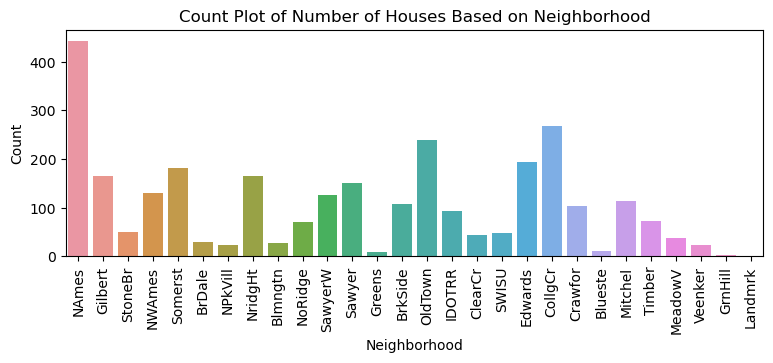

In [125]:
# Creating a count plot of the "Neighborhood" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.countplot(data = df, x = 'Neighborhood')
plt.title('Count Plot of Number of Houses Based on Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation = 90);

-------------------------------

In [126]:
# Getting the column names of the data frame using ".columns"
df.columns

Index(['Neighborhood', 'Year Built', 'Overall Qual', 'Kitchen Qual',
       'Exter Qual', 'Lot Area', 'SalePrice'],
      dtype='object')

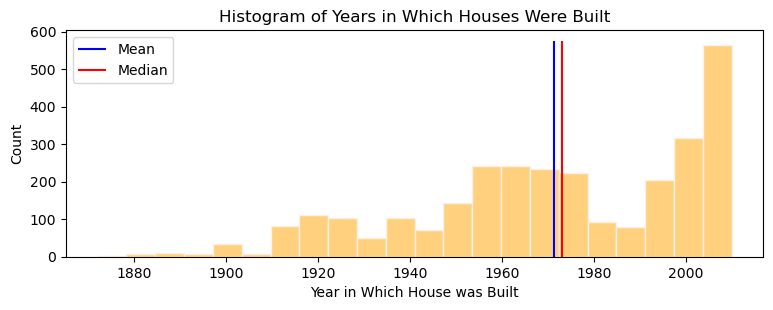

In [127]:
# Creating a histogram of the "Year Built" feature and also showing the mean and the median
plt.figure(figsize = (9, 3), dpi= 100)
sns.histplot(data = df, x = 'Year Built', color = 'orange', edgecolor = 'linen', alpha = 0.5)
plt.title('Histogram of Years in Which Houses Were Built')
plt.xlabel('Year in Which House was Built')
plt.ylabel('Count')
plt.vlines(x = df['Year Built'].mean(), ymin = 0, ymax = 575, colors = 'blue', label = 'Mean')
plt.vlines(x = df['Year Built'].median(), ymin = 0, ymax = 575, colors = 'red', label = 'Median')
plt.legend(loc = 'upper left');

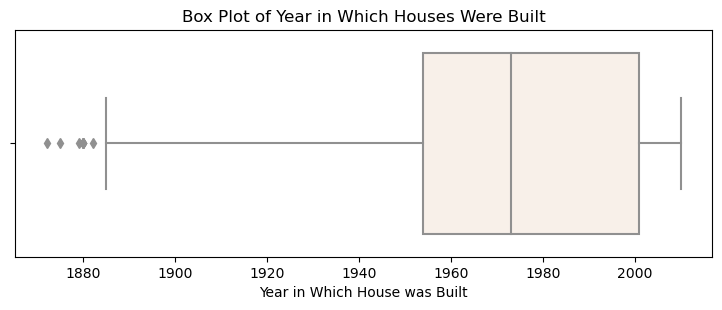

In [128]:
# Creating a box plot of the "Year Built" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.boxplot(data = df, x = 'Year Built', color = 'linen')
plt.title('Box Plot of Year in Which Houses Were Built')
plt.xlabel('Year in Which House was Built');

---------------------------

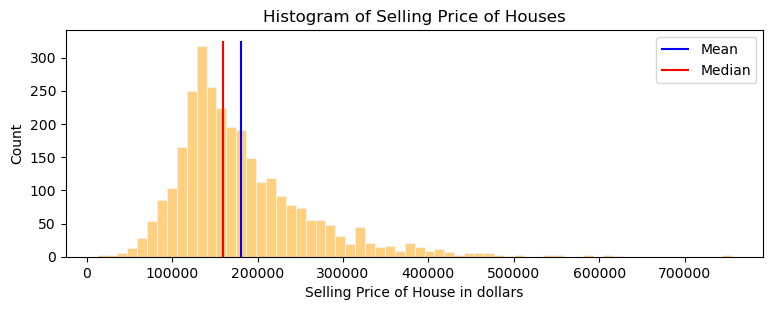

In [129]:
# Creating a histogram of the "SalePrice" feature and also showing the mean and the median
plt.figure(figsize = (9, 3), dpi= 100)
sns.histplot(data = df, x = 'SalePrice', color = 'orange', edgecolor = 'linen', alpha = 0.5)
plt.title('Histogram of Selling Price of Houses')
plt.xlabel('Selling Price of House in dollars')
plt.ylabel('Count')
plt.vlines(x = df['SalePrice'].mean(), ymin = 0, ymax = 325, colors = 'blue', label = 'Mean')
plt.vlines(x = df['SalePrice'].median(), ymin = 0, ymax = 325, colors = 'red', label = 'Median')
plt.legend();

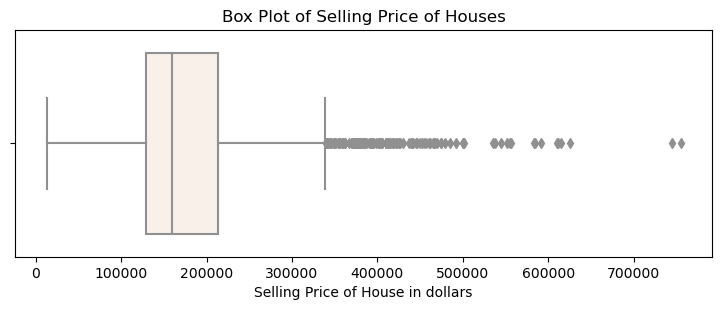

In [130]:
# Creating a box plot of the "SalePrice" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.boxplot(data = df, x = 'SalePrice', color = 'linen')
plt.title('Box Plot of Selling Price of Houses')
plt.xlabel('Selling Price of House in dollars');

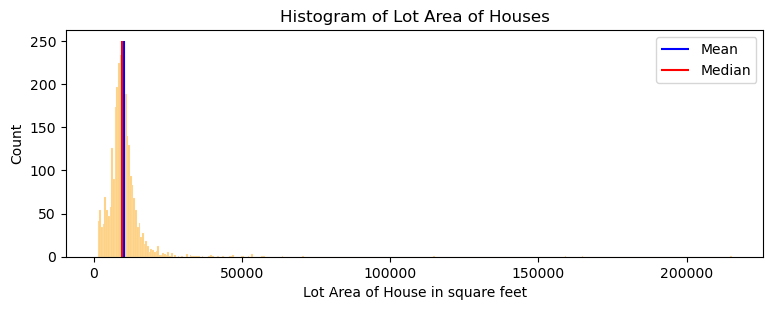

In [131]:
# Creating a histogram of the "Lot Area" feature and also showing the mean and the median
plt.figure(figsize = (9, 3), dpi= 100)
sns.histplot(data = df, x = 'Lot Area', color = 'orange', edgecolor = 'linen', alpha = 0.5)
plt.title('Histogram of Lot Area of Houses')
plt.xlabel('Lot Area of House in square feet')
plt.ylabel('Count')
plt.vlines(x = df['Lot Area'].mean(), ymin = 0, ymax = 250, colors = 'blue', label = 'Mean')
plt.vlines(x = df['Lot Area'].median(), ymin = 0, ymax = 250, colors = 'red', label = 'Median')
plt.legend();

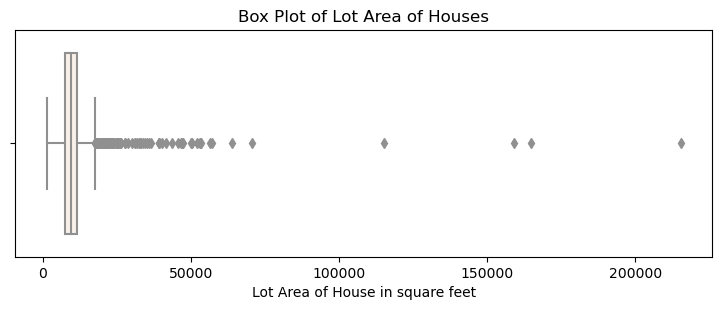

In [132]:
# Creating a box plot of the "Lot Area" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.boxplot(data = df, x = 'Lot Area', color = 'linen')
plt.title('Box Plot of Lot Area of Houses')
plt.xlabel('Lot Area of House in square feet');

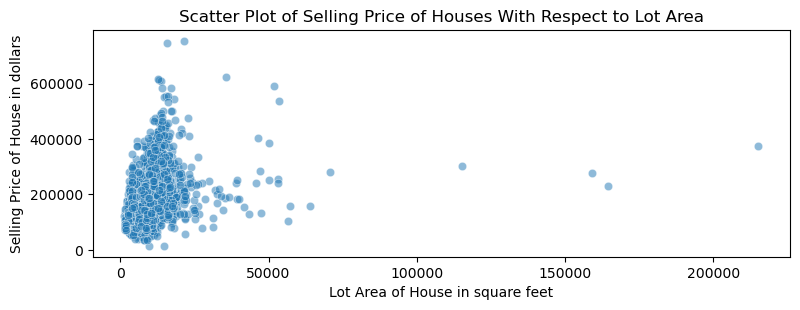

In [133]:
# Creating a scatter plot of the "Lot Area" and "SalePrice" features
plt.figure(figsize = (9, 3), dpi= 100)
sns.scatterplot(data = df, x = 'Lot Area', y = 'SalePrice', alpha = 0.5)
plt.title('Scatter Plot of Selling Price of Houses With Respect to Lot Area')
plt.xlabel('Lot Area of House in square feet')
plt.ylabel('Selling Price of House in dollars');

In [134]:
# Creating a new feature in the data frame to contain ratio of "SalePrice" and "Lot Area" features
df['Price per Area'] = df['SalePrice']/df['Lot Area']

In [135]:
# Taking a brief look at the data using ".head()"
df.head()

,Neighborhood,Year Built,Overall Qual,Kitchen Qual,Exter Qual,Lot Area,SalePrice,Price per Area
PID,,,,,,,,
526301100,NAmes,1960,6,TA,TA,31770,215000,6.767391
526350040,NAmes,1961,5,TA,TA,11622,105000,9.034590
526351010,NAmes,1958,6,Gd,TA,14267,172000,12.055793
526353030,NAmes,1968,7,Ex,Gd,11160,244000,21.863799
527105010,Gilbert,1997,5,TA,TA,13830,189900,13.731020


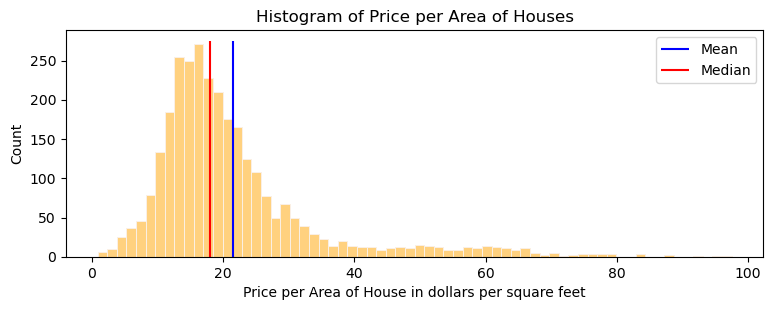

In [136]:
# Creating a histogram of the "Price per Area" feature and also showing the mean and the median
plt.figure(figsize = (9, 3), dpi= 100)
sns.histplot(data = df, x = 'Price per Area', color = 'orange', edgecolor = 'linen', alpha = 0.5)
plt.title('Histogram of Price per Area of Houses')
plt.xlabel('Price per Area of House in dollars per square feet')
plt.ylabel('Count')
plt.vlines(x = df['Price per Area'].mean(), ymin = 0, ymax = 275, colors = 'blue', label = 'Mean')
plt.vlines(x = df['Price per Area'].median(), ymin = 0, ymax = 275, colors = 'red', label = 'Median')
plt.legend();

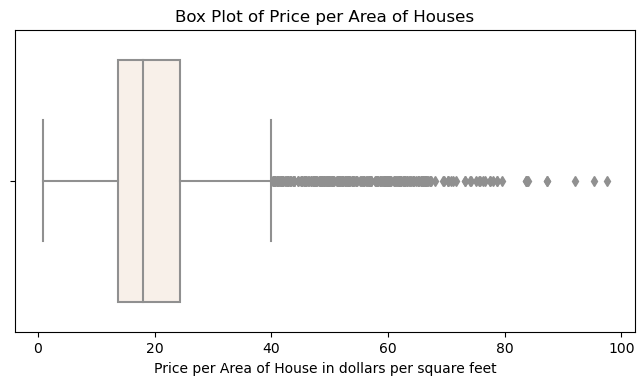

In [137]:
# Creating a box plot of the "Price per Area" feature
plt.figure(figsize = (8, 4), dpi= 100)
sns.boxplot(data = df, x = 'Price per Area', color = 'linen')
plt.title('Box Plot of Price per Area of Houses')
plt.xlabel('Price per Area of House in dollars per square feet');

----------------------

In [138]:
# Getting the column names of the data frame using ".columns"
df.columns

Index(['Neighborhood', 'Year Built', 'Overall Qual', 'Kitchen Qual',
       'Exter Qual', 'Lot Area', 'SalePrice', 'Price per Area'],
      dtype='object')

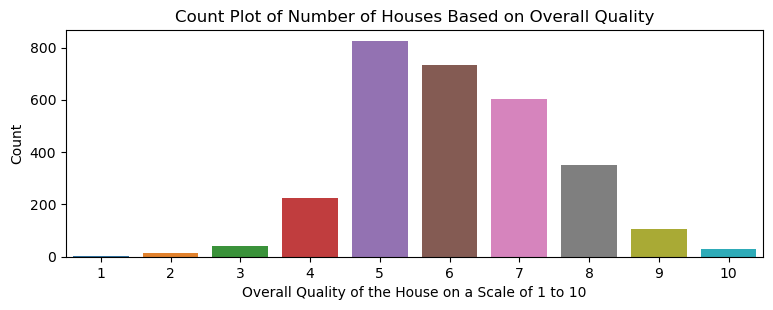

In [139]:
# Creating a count plot of the "Overall Qual" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.countplot(data = df, x = 'Overall Qual')
plt.title('Count Plot of Number of Houses Based on Overall Quality')
plt.xlabel('Overall Quality of the House on a Scale of 1 to 10')
plt.ylabel('Count');

------------------------

In [140]:
# Getting the column names of the data frame using ".columns"
df.columns

Index(['Neighborhood', 'Year Built', 'Overall Qual', 'Kitchen Qual',
       'Exter Qual', 'Lot Area', 'SalePrice', 'Price per Area'],
      dtype='object')

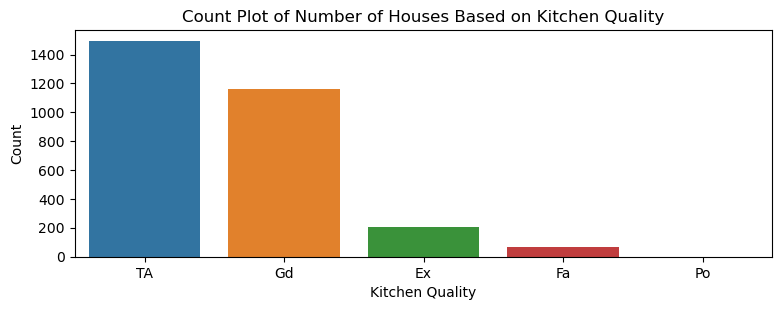

In [141]:
# Creating a count plot of the "Kitchen Qual" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.countplot(data = df, x = 'Kitchen Qual')
plt.title('Count Plot of Number of Houses Based on Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Count');

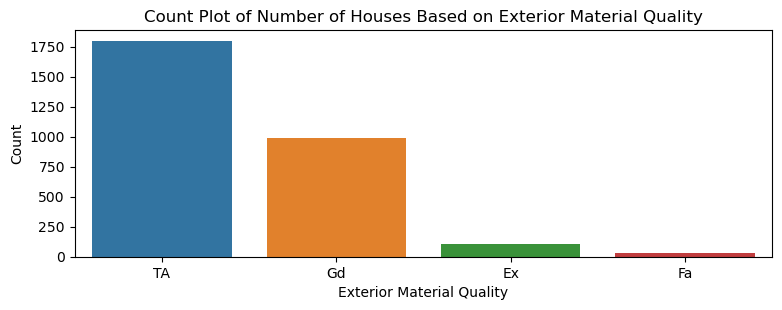

In [142]:
# Creating a count plot of the "Exter Qual" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.countplot(data = df, x = 'Exter Qual')
plt.title('Count Plot of Number of Houses Based on Exterior Material Quality')
plt.xlabel('Exterior Material Quality')
plt.ylabel('Count');

------------------------------

# Task 4 - Subsetting the dataframe to meet the Business requirements

In [143]:
# Taking a brief look again at the data using ".head()" before subsetting
df.head()

,Neighborhood,Year Built,Overall Qual,Kitchen Qual,Exter Qual,Lot Area,SalePrice,Price per Area
PID,,,,,,,,
526301100,NAmes,1960,6,TA,TA,31770,215000,6.767391
526350040,NAmes,1961,5,TA,TA,11622,105000,9.034590
526351010,NAmes,1958,6,Gd,TA,14267,172000,12.055793
526353030,NAmes,1968,7,Ex,Gd,11160,244000,21.863799
527105010,Gilbert,1997,5,TA,TA,13830,189900,13.731020


In [144]:
# Getting the dimensions of the data frame using ".shape"
# before subsetting

df.shape

(2930, 8)

In [145]:
# Subsetting the data frame to contain only the houses whose "Year Built" feature is greater than the median
yr_median = df['Year Built'].median()
df = df[df['Year Built'] > yr_median]

In [146]:
# Subsetting the data frame to contain only the houses whose "Price per Area" feature is less than the median
ppa_median = df['Price per Area'].median()
df = df[df['Price per Area'] < ppa_median]

In [147]:
# Subsetting the data frame to contain only the houses whose "Overall Qual" feature is greater than the mode
ovq_mode = df['Overall Qual'].value_counts().index[0]
df = df[df['Overall Qual'] > ovq_mode]

In [148]:
# Subsetting the data frame to contain only the houses whose "Kitchen Qual" feature is typical, good or excellent
df = df[(df['Kitchen Qual'] != "Po") & (df['Kitchen Qual'] != "Fa")]

In [149]:
# Subsetting the data frame to contain only the houses whose "Exter Qual" feature is typical, good or excellent
df = df[(df['Exter Qual'] != "Po") & (df['Exter Qual'] != "Fa")]

In [150]:
# Getting the dimensions of the data frame using ".shape"
# After subsetting to meet the requirements

df.shape

(112, 8)

-------------------

In [151]:
# Taking a brief look at the data using ".head()" after subsetting
df.head()

,Neighborhood,Year Built,Overall Qual,Kitchen Qual,Exter Qual,Lot Area,SalePrice,Price per Area
PID,,,,,,,,
527216070,StoneBr,2003,8,Ex,Ex,53504,538000,10.055323
527225035,Gilbert,1988,8,TA,Gd,12134,164000,13.515741
528138020,NridgHt,2005,8,Ex,Gd,14122,259000,18.340178
528344070,NoRidge,1998,8,Gd,Gd,17433,355000,20.363678
533238045,Somerst,2010,8,Gd,Gd,12853,267916,20.844628


-----------------------

# Task 5 - Creating a new data frame "nbd" (neighbourhood) to store the representative values for each neighbourhood

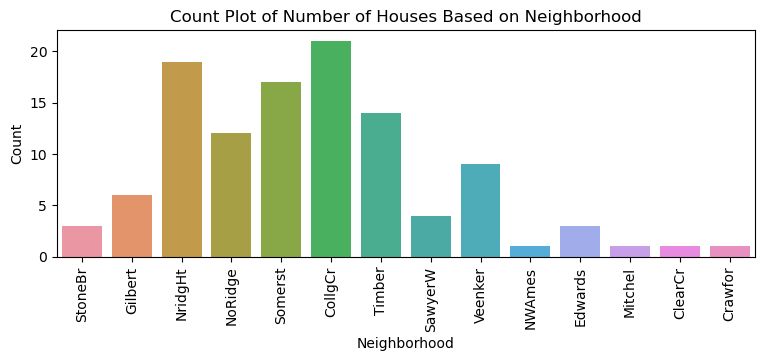

In [152]:
# Creating a count plot of the "Neighborhood" feature
plt.figure(figsize = (9, 3), dpi= 100)
sns.countplot(data = df, x = 'Neighborhood')
plt.title('Count Plot of Number of Houses Based on Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation = 90);

-------------------

In [153]:
# Storing the unique neighbourhood names in the data frame as a list
nbd_names = df['Neighborhood'].unique()
nbd_names

array(['StoneBr', 'Gilbert', 'NridgHt', 'NoRidge', 'Somerst', 'CollgCr',
       'Timber', 'SawyerW', 'Veenker', 'NWAmes', 'Edwards', 'Mitchel',
       'ClearCr', 'Crawfor'], dtype=object)

In [154]:
# Storing the number of houses for each neighbourhood
nbd_houses = df.groupby('Neighborhood').apply(lambda x: x.shape[0])
nbd_houses = nbd_houses.reindex(index = nbd_names)
nbd_houses

Neighborhood
StoneBr     3
Gilbert     6
NridgHt    19
NoRidge    12
Somerst    17
CollgCr    21
Timber     14
SawyerW     4
Veenker     9
NWAmes      1
Edwards     3
Mitchel     1
ClearCr     1
Crawfor     1
dtype: int64

In [155]:
# Storing the median "Year Built" feature for each neighbourhood
nbd_year = df.groupby('Neighborhood')['Year Built'].median()
nbd_year = nbd_year.reindex(index = nbd_names)
nbd_year

Neighborhood
StoneBr    2003.0
Gilbert    2003.0
NridgHt    2005.0
NoRidge    1994.0
Somerst    2006.0
CollgCr    2002.0
Timber     2005.5
SawyerW    1994.0
Veenker    1980.0
NWAmes     1996.0
Edwards    2008.0
Mitchel    2002.0
ClearCr    1976.0
Crawfor    1986.0
Name: Year Built, dtype: float64

In [156]:
# Storing the mean "Overall Qual" feature for each neighbourhood
nbd_ovq = df.groupby('Neighborhood')['Overall Qual'].mean()
nbd_ovq = nbd_ovq.reindex(index = nbd_names)
nbd_ovq

Neighborhood
StoneBr     8.333333
Gilbert     8.000000
NridgHt     8.263158
NoRidge     8.166667
Somerst     8.117647
CollgCr     8.047619
Timber      8.142857
SawyerW     8.000000
Veenker     8.222222
NWAmes      8.000000
Edwards    10.000000
Mitchel     8.000000
ClearCr     8.000000
Crawfor     8.000000
Name: Overall Qual, dtype: float64

In [157]:
# Storing the modal "Kitchen Qual" feature for each neighbourhood
nbd_kcq = df.groupby('Neighborhood')['Kitchen Qual'].apply(lambda x: x.value_counts().index[0])
nbd_kcq = nbd_kcq.reindex(index = nbd_names)
nbd_kcq

Neighborhood
StoneBr    Gd
Gilbert    Gd
NridgHt    Gd
NoRidge    Gd
Somerst    Gd
CollgCr    Gd
Timber     Gd
SawyerW    Gd
Veenker    Gd
NWAmes     Gd
Edwards    Ex
Mitchel    Gd
ClearCr    Gd
Crawfor    Gd
Name: Kitchen Qual, dtype: object

In [158]:
# Storing the modal "Exter Qual" feature for each neighbourhood
nbd_exq = df.groupby('Neighborhood')['Exter Qual'].apply(lambda x: x.value_counts().index[0])
nbd_exq = nbd_exq.reindex(index = nbd_names)
nbd_exq

Neighborhood
StoneBr    Ex
Gilbert    Gd
NridgHt    Gd
NoRidge    Gd
Somerst    Gd
CollgCr    Gd
Timber     Gd
SawyerW    Gd
Veenker    Gd
NWAmes     Gd
Edwards    Ex
Mitchel    Gd
ClearCr    Gd
Crawfor    Gd
Name: Exter Qual, dtype: object

In [159]:
# Storing the mean "Lot Area" feature for each neighbourhood
nbd_lot = df.groupby('Neighborhood')['Lot Area'].mean()
nbd_lot = nbd_lot.reindex(index = nbd_names)
nbd_lot

Neighborhood
StoneBr    39528.666667
Gilbert    11672.333333
NridgHt    15466.157895
NoRidge    18624.583333
Somerst    12867.823529
CollgCr    12782.809524
Timber     13445.214286
SawyerW    10297.500000
Veenker    19433.111111
NWAmes     14311.000000
Edwards    47757.000000
Mitchel    13265.000000
ClearCr    20064.000000
Crawfor    18044.000000
Name: Lot Area, dtype: float64

In [160]:
# Storing the mean "SalePrice" feature for each neighbourhood
nbd_sp = df.groupby('Neighborhood')['SalePrice'].mean()
nbd_sp = nbd_sp.reindex(index = nbd_names)
nbd_sp

Neighborhood
StoneBr    466529.000000
Gilbert    223000.000000
NridgHt    302021.368421
NoRidge    324170.833333
Somerst    256204.647059
CollgCr    241956.190476
Timber     264538.714286
SawyerW    215750.000000
Veenker    270583.333333
NWAmes     306000.000000
Edwards    176200.000000
Mitchel    271000.000000
ClearCr    279000.000000
Crawfor    315000.000000
Name: SalePrice, dtype: float64

In [161]:
# Storing the mean "Price per Area" feature for each neighbourhood
nbd_ppa = df.groupby('Neighborhood')['Price per Area'].mean()
nbd_ppa = nbd_ppa.reindex(index = nbd_names)
nbd_ppa

Neighborhood
StoneBr    14.011932
Gilbert    19.160525
NridgHt    19.692874
NoRidge    19.200591
Somerst    19.868429
CollgCr    19.207571
Timber     19.939039
SawyerW    21.018843
Veenker    16.295566
NWAmes     21.382154
Edwards     3.930550
Mitchel    20.429702
ClearCr    13.905502
Crawfor    17.457327
Name: Price per Area, dtype: float64

In [162]:
# Calculating and storing the mean absolute deviation values for the "Price per Area" feature about its mean for each neighbourhood
nbd_ppa_mad = df.groupby('Neighborhood')['Price per Area'].mad()
nbd_ppa_mad = nbd_ppa_mad.reindex(index = nbd_names)
nbd_ppa_mad

Neighborhood
StoneBr    4.390784
Gilbert    1.920681
NridgHt    1.994279
NoRidge    2.829039
Somerst    1.358809
CollgCr    2.119454
Timber     2.300928
SawyerW    1.188072
Veenker    4.184029
NWAmes     0.000000
Edwards    0.950752
Mitchel    0.000000
ClearCr    0.000000
Crawfor    0.000000
Name: Price per Area, dtype: float64

In [163]:
# Creating a data frame to store the representative values for each neighbourhood
nbd = pd.DataFrame(data = {'Number of Houses' : nbd_houses,
                           'Median Year Built' : nbd_year,
                           'Mean Overall Quality' : nbd_ovq,
                           'Modal Kitchen Quality' : nbd_kcq,
                           'Modal Exter Quality' : nbd_exq,
                           'Mean Lot Area' : nbd_lot,
                           'Mean Sale Price' : nbd_sp,
                           'Mean Price per Area' : nbd_ppa,
                           'Deviation in Price per Area' : nbd_ppa_mad},
                   index = nbd_names)

In [164]:
# Viewing a summary of the relevant values for each neighbourhood using the data frame "nbd"
nbd

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
StoneBr,3,2003.0,8.333333,Gd,Ex,39528.666667,466529.000000,14.011932,4.390784
Gilbert,6,2003.0,8.000000,Gd,Gd,11672.333333,223000.000000,19.160525,1.920681
NridgHt,19,2005.0,8.263158,Gd,Gd,15466.157895,302021.368421,19.692874,1.994279
NoRidge,12,1994.0,8.166667,Gd,Gd,18624.583333,324170.833333,19.200591,2.829039
Somerst,17,2006.0,8.117647,Gd,Gd,12867.823529,256204.647059,19.868429,1.358809
CollgCr,21,2002.0,8.047619,Gd,Gd,12782.809524,241956.190476,19.207571,2.119454
Timber,14,2005.5,8.142857,Gd,Gd,13445.214286,264538.714286,19.939039,2.300928
SawyerW,4,1994.0,8.000000,Gd,Gd,10297.500000,215750.000000,21.018843,1.188072
Veenker,9,1980.0,8.222222,Gd,Gd,19433.111111,270583.333333,16.295566,4.184029
NWAmes,1,1996.0,8.000000,Gd,Gd,14311.000000,306000.000000,21.382154,0.000000


----------------------

# Task 6 - Sorting the resulting summary of the neighbourhoods based on the price per area and recommend the top three neighbourhoods.

In [165]:
# Retaining only those neighbourhoods that have more than one house
nbd = nbd[nbd['Number of Houses'] > 1]

nbd

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
StoneBr,3,2003.0,8.333333,Gd,Ex,39528.666667,466529.000000,14.011932,4.390784
Gilbert,6,2003.0,8.000000,Gd,Gd,11672.333333,223000.000000,19.160525,1.920681
NridgHt,19,2005.0,8.263158,Gd,Gd,15466.157895,302021.368421,19.692874,1.994279
NoRidge,12,1994.0,8.166667,Gd,Gd,18624.583333,324170.833333,19.200591,2.829039
Somerst,17,2006.0,8.117647,Gd,Gd,12867.823529,256204.647059,19.868429,1.358809
CollgCr,21,2002.0,8.047619,Gd,Gd,12782.809524,241956.190476,19.207571,2.119454
Timber,14,2005.5,8.142857,Gd,Gd,13445.214286,264538.714286,19.939039,2.300928
SawyerW,4,1994.0,8.000000,Gd,Gd,10297.500000,215750.000000,21.018843,1.188072
Veenker,9,1980.0,8.222222,Gd,Gd,19433.111111,270583.333333,16.295566,4.184029
Edwards,3,2008.0,10.000000,Ex,Ex,47757.000000,176200.000000,3.930550,0.950752


In [166]:
# Sorting the data frame "nbd" based on the "Mean Price per Area" feature
nbd.sort_values(by = 'Mean Price per Area', ascending = True)

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
Edwards,3,2008.0,10.000000,Ex,Ex,47757.000000,176200.000000,3.930550,0.950752
StoneBr,3,2003.0,8.333333,Gd,Ex,39528.666667,466529.000000,14.011932,4.390784
Veenker,9,1980.0,8.222222,Gd,Gd,19433.111111,270583.333333,16.295566,4.184029
Gilbert,6,2003.0,8.000000,Gd,Gd,11672.333333,223000.000000,19.160525,1.920681
NoRidge,12,1994.0,8.166667,Gd,Gd,18624.583333,324170.833333,19.200591,2.829039
CollgCr,21,2002.0,8.047619,Gd,Gd,12782.809524,241956.190476,19.207571,2.119454
NridgHt,19,2005.0,8.263158,Gd,Gd,15466.157895,302021.368421,19.692874,1.994279
Somerst,17,2006.0,8.117647,Gd,Gd,12867.823529,256204.647059,19.868429,1.358809
Timber,14,2005.5,8.142857,Gd,Gd,13445.214286,264538.714286,19.939039,2.300928
SawyerW,4,1994.0,8.000000,Gd,Gd,10297.500000,215750.000000,21.018843,1.188072


In [167]:
# Sorting the data frame "nbd" based on the "Deviation in Price per Area" feature
nbd.sort_values(by = 'Deviation in Price per Area', ascending = True)

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
Edwards,3,2008.0,10.000000,Ex,Ex,47757.000000,176200.000000,3.930550,0.950752
SawyerW,4,1994.0,8.000000,Gd,Gd,10297.500000,215750.000000,21.018843,1.188072
Somerst,17,2006.0,8.117647,Gd,Gd,12867.823529,256204.647059,19.868429,1.358809
Gilbert,6,2003.0,8.000000,Gd,Gd,11672.333333,223000.000000,19.160525,1.920681
NridgHt,19,2005.0,8.263158,Gd,Gd,15466.157895,302021.368421,19.692874,1.994279
CollgCr,21,2002.0,8.047619,Gd,Gd,12782.809524,241956.190476,19.207571,2.119454
Timber,14,2005.5,8.142857,Gd,Gd,13445.214286,264538.714286,19.939039,2.300928
NoRidge,12,1994.0,8.166667,Gd,Gd,18624.583333,324170.833333,19.200591,2.829039
Veenker,9,1980.0,8.222222,Gd,Gd,19433.111111,270583.333333,16.295566,4.184029
StoneBr,3,2003.0,8.333333,Gd,Ex,39528.666667,466529.000000,14.011932,4.390784


------------------------------------

#### Getting the top three neighbourhoods in which to invest based on "Price per Area" and "Deviation in Price per Area"

In [168]:
# Getting the top three neighbourhoods in which to invest based on "Price per Area" and "Deviation in Price per Area"
nbd[(nbd['Mean Price per Area'] < nbd['Mean Price per Area'].median()) & (nbd['Deviation in Price per Area'] < nbd['Deviation in Price per Area'].median())].head(3)

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
Gilbert,6,2003.0,8.0,Gd,Gd,11672.333333,223000.0,19.160525,1.920681
Edwards,3,2008.0,10.0,Ex,Ex,47757.000000,176200.0,3.930550,0.950752


-------------------------------

# Result(Solution)

In [169]:
# Getting the top three neighbourhoods in which to invest based on "Price per Area" and "Deviation in Price per Area"
# Considering neighbourhoods with "Mean Price per Area" less than 20 dollars per square feet
# Considering neighbourhoods with "Deviation in Price per Area" less than 2 dollars per square feet
nbd[(nbd['Mean Price per Area'] < 20) & (nbd['Deviation in Price per Area'] < 2)].head(3)

,Number of Houses,Median Year Built,Mean Overall Quality,Modal Kitchen Quality,Modal Exter Quality,Mean Lot Area,Mean Sale Price,Mean Price per Area,Deviation in Price per Area
Gilbert,6,2003.0,8.000000,Gd,Gd,11672.333333,223000.000000,19.160525,1.920681
NridgHt,19,2005.0,8.263158,Gd,Gd,15466.157895,302021.368421,19.692874,1.994279
Somerst,17,2006.0,8.117647,Gd,Gd,12867.823529,256204.647059,19.868429,1.358809


### Three neighbourhoods were narrowed down according to the criteria such as maximum quality and quantity with the least price as well as the least variations of prices.

##### 1) Gilbert
##### 2) NridgHt
##### 3) Somerst

-------------------

# Task 7 - Project Summary

Let’s summarise the complete solution in sequential stages:

##### Stage 1: 

1) we loaded the data and studied its description.

2) The original data frame has 2,930 properties and seven features (excluding the Property IDs, which are used as the row indices).

3) we also learnt that the data set has no missing values.


##### Stage 2: 

1) Using a count plot, we noticed that neighbourhoods such as ‘NAmes’ and ‘CollgCr’ have the maximum number of houses, and neighbourhoods such as ‘Landmrk’ and ‘GrnHill’ have the least number of houses.

2) Next, we studied the histogram of the ‘Year Built’ feature and learnt that the mean and the median of this feature were approximately 1,970.

3) we also observed a spike for the years around 2010. So, we considered using the median of the ‘Year Built’ feature to retain those properties in the data frame that were constructed relatively recently.

4) we then analysed the ‘SalePrice’ and ‘Lot Area’ features using their histograms. we observed that the prices of most of the houses were approximately 1,50,000 dollar and lot areas of approximately 10,000 square feet.

5) Then, we engineered a new feature called ‘Price per Area’, which is the ratio of the ‘SalePrice’ feature to the ‘Lot Area’ feature for each of the properties.

6) we then analysed the ‘Price per Area’ feature using its histogram. we observed that the price per unit area of most of the houses was approximately 20 dollar per square foot.

7) Then, we analysed the ‘Overall Qual’ feature using a count plot and observed that most houses had an overall quality of 5, 6 or 7.

8) Next, we analysed the ‘Kitchen Qual’ and the ‘Exter Qual’ features using count plots and saw that both kitchen quality and exterior material quality of most houses were typical or good.


##### Stage 3: 

1) Based on our analysis of the data and its features, we decided to subset the original data frame based on certain conditions. 

2) These conditions are: 
    - the year in which a house was built should be greater than the median of all the ‘Year Built’ values;
    - the price per unit area for a house should be lower than the median of the ‘Price per Area’ values; 
    - the overall quality of a house should be greater than mode of the ‘Overall Qual’ values; 
    - and the kitchen quality and the exterior material quality of a house should not be ‘Po’ (Poor) or ‘Fa’ (Fair).

3) After subsetting the data frame based on these conditions, it was narrowed down to 112 houses. This is not even 5% of the original data set, but this is the type of rigour expected by the investor.


##### Stage 4: 

1) we then took a look at the new data frame and checked the distribution of the number of viable houses per neighbourhood using a count plot.

2) we saw that ‘CollgCr’ is still one of the contenders, but ‘NAmes’ is not present anymore.

3) Then, we calculated the relevant statistics for all the houses for each neighbourhood.

4) For this, we used Python’s ‘.groupby()’ method. we calculated the following values for each of the neighbourhoods: number of houses, median ‘Year Built’, mean ‘Overall Qual’, modal ‘Kitchen Qual’, modal ‘Exter Qual’, mean ‘Lot Area’, mean ‘SalePrice’, mean ‘Price per Area’ and the mean absolute deviation about the mean for ‘Price per Area’.

5) we then created a new data frame whose rows are neighbourhoods and used the values calculated previously to summarise all of the neighbourhoods.


##### Stage 5: 

1) Then, we observed that there was only one house in some neighbourhoods. 

2) we removed those entries from the data frame. Next, the neighbourhoods that remain are as follows: ‘Edwards’, ‘StoneBr’, ‘Veenker’, ‘Gilbert’, ‘NoRidge’, ‘CollgCr’, ‘NridgHt’, ‘Somerst’, ‘Timber’ and ‘SawyerW’.


##### Stage 6: 

1) we then subsetted the data frame to contain only those neighbourhoods that have a lower mean ‘Price per Area’ than the median of the ‘Mean Price per Area’ feature and a lower mean absolute deviation in the ‘Price per Area’ feature than the median of the ‘Deviation in Price per Area’ feature.

2) Result; Three neighbourhoods were narrowed down according to the criteria such as maximum quality and quantity with the least price as well as the least variations of prices, as we know, this is the type of rigour expected by the investor.
##### 1) Gilbert
##### 2) NridgHt
##### 3) Somerst

-------------------

------------- END --------------